<a href="https://colab.research.google.com/github/AoShuang92/PhD_tutorial/blob/main/BLIP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLIP: Inference Demo
 - [Image Captioning](#Image-Captioning)
 - [VQA](#VQA)
 - [Feature Extraction](#Feature-Extraction)
 - [Image Text Matching](#Image-Text-Matching)

In [1]:
# install requirements
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 -q install timm==0.4.12 fairscale==0.4.4
    !git clone https://github.com/salesforce/BLIP
    %cd BLIP

Running in Colab.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Cloning into 'BLIP'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 277 (delta 137), reused 136 (delta 135), pack-reused 112
Receiving objects: 100% (277/277), 7.03 MiB | 21.76 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/BLIP


In [2]:
!pip install -q transformers==4.25.1

In [ ]:
# need to downgrade the transformer version
import transformers
transformers.__version__

'4.25.1'

In [1]:
%cd BLIP
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

/content/BLIP


# Image Captioning
Perform image captioning using finetuned BLIP model

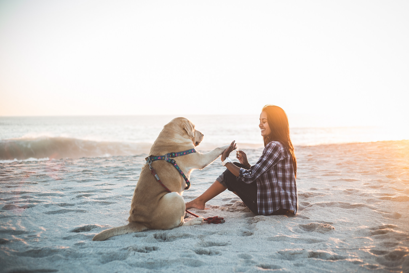

100%|██████████| 1.97G/1.97G [00:26<00:00, 78.8MB/s]


reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a woman and her dog on the beach


In [ ]:
from models.blip import blip_decoder

image_size = 384
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'

model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    # beam search
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
    # nucleus sampling
    # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5)
    print('caption: '+caption[0])

In [ ]:
!pwd

/content/BLIP


# VQA
Perform visual question answering using finetuned BLIP model

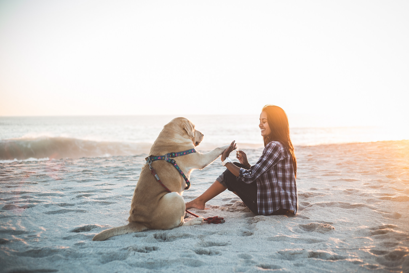

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
torch.Size([1, 3, 480, 480])
image_embeds torch.Size([1, 901, 768])
image_atts torch.Size([1, 901])
question {'input_ids': tensor([[ 101, 2073, 2003, 1996, 2450, 3564, 1029,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
ques_enc tensor([101])
question_inptids tensor([30523])
after_q tensor([[30523,  2073,  2003,  1996,  2450,  3564,  1029,   102]])
hidden_states torch.Size([1, 8, 768])


AttributeError: ignored

In [2]:
from models.blip_vqa import blip_vqa

image_size = 480
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'

model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

question = 'where is the woman sitting?'
print(image.size())
# print(question.shape)
# with torch.no_grad():
#     answer = model(image, question, train=False, inference='generate')
#     print('answer: '+answer[0])

/content/BLIP


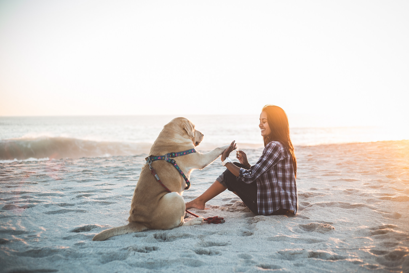

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth


In [1]:
%cd BLIP
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

from models.blip_vqa import blip_vqa

image_size = 480
image = load_demo_image(image_size=image_size, device=device)
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'

model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

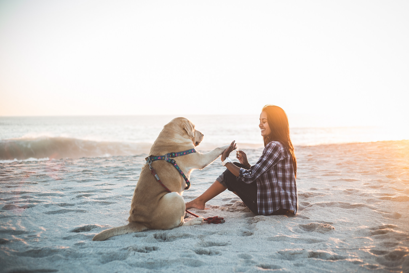

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
hidden_states torch.Size([1, 9, 768])
encoder_hidden_states None
query_layer.shape, key_layer: torch.Size([1, 12, 9, 64]) torch.Size([1, 12, 64, 9])
attention_scores torch.Size([1, 12, 9, 9])
outputs: (tensor([[[-0.0352, -0.0361,  0.0442,  ..., -0.0087, -0.0064, -0.0051],
         [-0.0406, -0.0243,  0.0521,  ..., -0.0308, -0.0154,  0.0231],
         [-0.0472, -0.0538,  0.0652,  ..., -0.0708, -0.0492, -0.1016],
         ...,
         [-0.0553, -0.0566,  0.0424,  ..., -0.0639, -0.0440,  0.0171],
         [-0.0668, -0.0507,  0.0549,  ..., -0.0232, -0.0085, -0.0174],
         [-0.0120, -0.0333,  0.0687,  ...,  0.0449,  0.0139, -0.0014]]],
       grad_fn=<ViewBackward0>), (tensor([[[[ 1.7782, -0.7655, -0.8483,  ..., -0.2166, -1.0341,  0.4068],
          [-0.2776, -0.1701,  0.4474,  ...,  0.3111,  0.6576, -0.1453],
          [-0.2456, -0.4398,  1.2641,  ...,  0.1641,

In [3]:
from torch import nn
class MultimodalFusion(nn.Module):
    def __init__(self, ):
        super(MultimodalFusion, self).__init__()
        model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'
        model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
        model.eval()
        self.tokenizer = model.tokenizer
        self.enc_token_id = model.tokenizer.enc_token_id
        self.visual_encoder = model.visual_encoder
        self.text_encoder = model.text_encoder

    def forward(self, question, image):
        question = self.tokenizer(question, padding='longest', truncation=True, max_length=35,
                                  return_tensors="pt")
        question.input_ids[:,0] = self.enc_token_id
        image_embeds = self.visual_encoder(image)
        image_atts = torch.ones(image_embeds.size()[:-1],dtype=torch.long)
        fused_feature = self.text_encoder(question.input_ids,
                                                attention_mask = question.attention_mask,
                                                encoder_hidden_states = image_embeds,
                                                encoder_attention_mask = image_atts,
                                                return_dict = True)

        return fused_feature




image = load_demo_image(image_size=image_size, device=device)
question = 'hello where is the woman sitting?'
model_fusion = MultimodalFusion()
fused_feature = model_fusion(question, image)

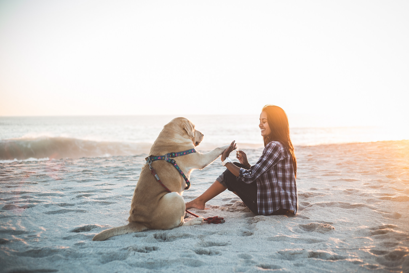

hidden_states torch.Size([1, 9, 768])
encoder_hidden_states None
query_layer.shape, key_layer: torch.Size([1, 12, 9, 64]) torch.Size([1, 12, 64, 9])
attention_scores torch.Size([1, 12, 9, 9])
outputs: (tensor([[[-0.0352, -0.0361,  0.0442,  ..., -0.0087, -0.0064, -0.0051],
         [-0.0406, -0.0243,  0.0521,  ..., -0.0308, -0.0154,  0.0231],
         [-0.0472, -0.0538,  0.0652,  ..., -0.0708, -0.0492, -0.1016],
         ...,
         [-0.0553, -0.0566,  0.0424,  ..., -0.0639, -0.0440,  0.0171],
         [-0.0668, -0.0507,  0.0549,  ..., -0.0232, -0.0085, -0.0174],
         [-0.0120, -0.0333,  0.0687,  ...,  0.0449,  0.0139, -0.0014]]],
       grad_fn=<ViewBackward0>), (tensor([[[[ 1.7782, -0.7655, -0.8483,  ..., -0.2166, -1.0341,  0.4068],
          [-0.2776, -0.1701,  0.4474,  ...,  0.3111,  0.6576, -0.1453],
          [-0.2456, -0.4398,  1.2641,  ...,  0.1641, -0.4565, -0.2332],
          ...,
          [-0.7356, -0.0376,  1.5222,  ...,  0.5763,  0.6785, -0.7116],
          [-2.2019,

In [2]:
question = 'hello where is the woman sitting?'
question = model.tokenizer(question, padding='longest', truncation=True, max_length=35,
                                  return_tensors="pt")
question.input_ids[:,0] = model.tokenizer.enc_token_id
image = load_demo_image(image_size=image_size, device=device)
image_embeds = model.visual_encoder(image)
image_atts = torch.ones(image_embeds.size()[:-1],dtype=torch.long)

question_output = model.text_encoder(question.input_ids,
                                                attention_mask = question.attention_mask,
                                                encoder_hidden_states = image_embeds,
                                                encoder_attention_mask = image_atts,
                                                return_dict = True)

In [7]:
image_embeds.size()

torch.Size([1, 901, 768])

# Feature Extraction

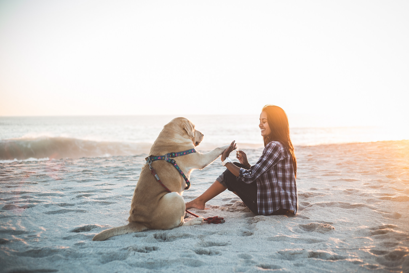

100%|██████████| 1.97G/1.97G [00:25<00:00, 81.5MB/s]


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth


In [ ]:
from models.blip import blip_feature_extractor

image_size = 224
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth'

model = blip_feature_extractor(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

caption = 'a woman sitting on the beach with a dog'

multimodal_feature = model(image, caption, mode='multimodal')[0,0]
image_feature = model(image, caption, mode='image')[0,0]
text_feature = model(image, caption, mode='text')[0,0]

# Image-Text Matching

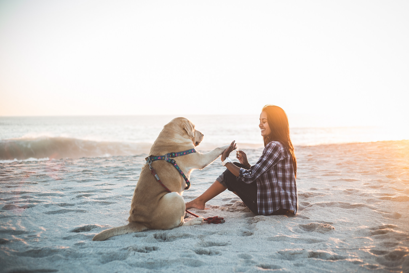

100%|██████████| 1.78G/1.78G [00:28<00:00, 67.6MB/s]


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth
text: a woman sitting on the beach with a dog
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 35])
torch.Size([1, 12, 35, 64]) torch.Size([1, 12, 64, 577])
torch.Size([1, 12, 35, 64]) torch.Size([

In [ ]:
from models.blip_itm import blip_itm

image_size = 384
image = load_demo_image(image_size=image_size,device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth'

model = blip_itm(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device='cpu')

caption = 'a woman sitting on the beach with a dog'

print('text: %s' %caption)

itm_output = model(image,caption,match_head='itm')
itm_score = torch.nn.functional.softmax(itm_output,dim=1)[:,1]
print('The image and text is matched with a probability of %.4f'%itm_score)

itc_score = model(image,caption,match_head='itc')
print('The image feature and text feature has a cosine similarity of %.4f'%itc_score)